# VST preparation for ApsisVAL3.5f

### M. Fouesneau

In [1]:
%%file document_configuration.tex
\def\documentTitle{VST preparation for ApsisVAL3.5f}
\def\documentAuthor{Morgan Fouesneau et al.}
\def\DpacDocRef{GAIA-C8-TN-MPIA-MFX-23}
\def\DpacDocRevision{0}

Writing document_configuration.tex


In [2]:
# Loading configuration
# Don't forget that mac has this annoying configuration that leads
# to limited number of figures/files
# ulimit -n 4096    <---- osx limits to 256

# Notebook matplotlib mode
%pylab inline                                 
# set for retina or hi-resolution displays
%config InlineBackend.figure_format='retina'  

import pylab as plt
import numpy as np
from ezdata.matplotlib import light_minimal
plt.style.use(light_minimal)

import subprocess
import datetime
import os
import re
from shutil import copyfile
from glob import glob

from mf_jupyter import (add_input_toggle, add_citation_button, add_hide_button,
                        LatexFigure, LatexNumberFormatter, LatexMultiFigures,
                        load_latex_macros, Markdown, disp_markdown, Table)

add_hide_button();      # Add mf_jupyter toolbar with meta and hide export button.
add_input_toggle();     # Hide code button
add_citation_button();  # Add bitex reference
load_latex_macros()     # Load latex macros `notebook_macros` file

import matplotlib as mpl
# add mf.sty macros to matplotlib
with open('mf.sty', 'r') as f:
    pack = [line for line in f if ('providecommand' in line)]
with open('macros.sty', 'r') as f:
    pack.extend([line for line in f if ('providecommand' in line)])
    
mpl.rcParams['text.latex.preamble'] += ''.join(pack)
disp_markdown(r"""(latex) $$""" + ''.join(pack).replace('provide', 'new') + r"""$$""")

Populating the interactive namespace from numpy and matplotlib


(Latex macros)
$
    \newcommand{\num}{{}}
    \newcommand{\dataerr}{\mathbf{\Sigma_D}}
    \newcommand{\PI}{\mathbf{\pi}}
    \newcommand{\nclobs}{n_{c,obs}}
    \newcommand{\nclpred}{n_{c,pred}}
    \newcommand{\birthrate}{\dot n_{birth}}
    \newcommand{\Mi}{M_{i}}
    \newcommand{\ts}{\tilde{t}}
    \newcommand{\tage}{t_{age}}
    \newcommand{\PI}{\overrightarrow{\pi}}
    \newcommand{\dif}{\,\text{d}} 
    \newcommand{\dt}{\Delta t}
    \newcommand{\Ge}{\gamma_e}
    \newcommand{\Gd}{\gamma_d} 
    \newcommand{\dif}{\,\text{d}} 
    \newcommand{\given}{\,\mid\,}
    \newcommand{\prob}{\mathcal{P}}
    \newcommand{\data}{\mathbf{D}}
    \newcommand{\datai}{\mathbf{D_i}}
    \newcommand{\T}{\mathbf{\theta}}
    \newcommand{\Ti}{\mathbf{\theta_i}}
    \newcommand{\err}{\mathbf{\Sigma_D}}
    \newcommand{\erri}{\mathbf{\Sigma_{D,i}}}
    \newcommand{\like}{\mathcal{L}}
    \newcommand{\best}{\mathrm{best}}
    \newcommand{\normal}{\mathcal{N}}
    \newcommand{\Pbad}{\prob_{\mathrm{b}}}
    \newcommand{\union}{\cup}
    \newcommand{\intersect}{\cap}
    \newcommand{\argmax}{\operatornamewithlimits{arg\,max}}
    \newcommand{\argmin}{\operatornamewithlimits{arg\,min}}
    \newcommand{\card}{\operatorname{card}}	
    \newcommand{\sgn}{\operatorname{sgn}}
    \newcommand{\rank}{\operatorname{rank}}				
    \newcommand{\EE}{\operatornamewithlimits{E}}
    \newcommand{\id}{\operatorname{id}}			
   \newcommand{\abs}[1]{\left| #1 \right|}
   \newcommand{\norm}[1]{\left\| #1 \right\|}
   \newcommand{\pa}[1]{\left(#1\right)}
   \newcommand{\bra}[1]{\left[#1\right]}
   \newcommand{\cbra}[1]{\left\{#1\right\}} 	
   \newcommand{\Vec}[1]{\overrightarrow}
   \newcommand{\mmatrix}[1]{\boldsymbol{#1}}
   \newcommand{\inverse}[1]{{#1}^{-1}}
   \newcommand{\transpose}[1]{{#1}^{\scriptscriptstyle \top}}
   \newcommand{\mean}[1]{\left<{#1}\right>}
   \newcommand{\Proba}[1]{\prob\left(\, #1 \,\right)}
   \newcommand{\proba}[1]{\prob(\, #1 \,)}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
$
$
  \newcommand{\Unit}[1]{{\mathrm{~#1}}} % define unit
  \newcommand{\um}{\mu\mathrm{m}}
  \newcommand{\erg}{\Unit{erg}}
  \newcommand{\ergs}{\Unit{erg~s}}
  \newcommand{\yr}{\Unit{yr}}
  \newcommand{\Myr}{\Unit{Myr}}
  \newcommand{\Gyr}{\Unit{Gyr}}
  \newcommand{\pc}{\Unit{pc}}
  \newcommand{\kpc}{\Unit{kpc}}
  \newcommand{\Mpc}{\Unit{Mpc}}
  \newcommand{\Lsun}{\Unit{L}_{\odot}}
  \newcommand{\Zsun}{\Unit{Z}_{\odot}}
  \newcommand{\msun}{\Unit{M}_{\odot}}
  \newcommand{\kms}{\Unit{km\,s^{-1}}}
  \newcommand{\ang}{\AA}               %Angstrom unit
  \newcommand{\degpoint}{\mbox{$^\circ\mskip-7.0mu.\,$}}
  \newcommand{\halpha}{\mbox{H$\alpha$}}
  \newcommand{\hbeta}{\mbox{H$\beta$}}
  \newcommand{\hgamma}{\mbox{H$\gamma$}}
  \newcommand{\lya}{\mbox{Ly$\alpha$}}
  \newcommand{\lyb}{\mbox{Ly$\beta$}}
  \newcommand{\minpoint}{\mbox{$'\mskip-4.7mu.\mskip0.8mu$}}
  \newcommand{\mv}{\mbox{$m_{_V}$}}
  \newcommand{\Mv}{\mbox{$M_{_V}$}}
  \newcommand{\peryr}{\mbox{$\>\rm yr^{-1}$}}
  \newcommand{\secpoint}{\mbox{$''\mskip-7.6mu.\,$}}
  \newcommand{\sqdeg}{\mbox{${\rm deg}^2$}}
  \newcommand{\squig}{\sim\!\!}
  \newcommand{\subsun}{\mbox{$_{\normalsize\odot}$}}
  \newcommand{\sq}{\mbox{\rlap{$\sqcap$}$\sqcup$}}% 
  \newcommand{\arcdeg}{\mbox{$^\circ$}}% 
  \newcommand{\arcmin}{\mbox{$^\prime$}}% 
  \newcommand{\arcsec}{\mbox{$^{\prime\prime}$}}% 
  \newcommand{\fd}{\mbox{$.\!\!^{\mathrm d}$}}% 
  \newcommand{\fh}{\mbox{$.\!\!^{\mathrm h}$}}% 
  \newcommand{\fm}{\mbox{$.\!\!^{\mathrm m}$}}% 
  \newcommand{\fs}{\mbox{$.\!\!^{\mathrm s}$}}% 
  \newcommand{\fdg}{\mbox{$.\!\!^\circ$}}% 
  \newcommand{\slantfrac}{\case}% 
  \newcommand{\onehalf}{\slantfrac{1}{2}}% 
  \newcommand{\onethird}{\slantfrac{1}{3}}% 
  \newcommand{\twothirds}{\slantfrac{2}{3}}% 
  \newcommand{\onequarter}{\slantfrac{1}{4}}% 
  \newcommand{\threequarters}{\slantfrac{3}{4}}% 
  \newcommand{\ubvr}{\mbox{$U\!BV\!R$}}%% UBVR system 
  \newcommand{\ub}{\mbox{$U\!-\!B$}}%   % U-B 
  \newcommand{\bv}{\mbox{$B\!-\!V$}}%   % B-V 
  \newcommand{\vr}{\mbox{$V\!-\!R$}}%   % V-R 
  \newcommand{\ur}{\mbox{$U\!-\!R$}}%   % U-R 
  \newcommand{\ion}[2]{#1$\;${\small\rmfamily\@Roman{#2}}\relax}% 
  \newcommand{\nodata}{ ~$\cdots$~ }% 
  \newcommand{\diameter}{\ooalign{\hfil/\hfil\crcr\mathhexbox20D}}% 
  \newcommand{\degr}{\arcdeg}% 
  \newcommand{\sun}{\odot}% 
  \newcommand{\Sun}{\sun}% 
  \newcommand{\Sol}{\sun}% 
  \newcommand{\Av}{{{\mathrm{A}}_{\mathrm{V}}}}
  \newcommand{\latin}[1]{\textsl{#1}}
  \newcommand{\aposteriori}{\latin{a~posteriori}}
  \newcommand{\apriori}{\latin{a~priori}}
  \newcommand{\adhoc}{\latin{ad~hoc}}
  \newcommand{\etal}{\latin{et~al.}}
  \newcommand{\eg}{{e.g.}}
  \newcommand{\ie}{\latin{i.e.}}
  \newcommand{\term}[1]{{\bf #1}}
  \newcommand{\code}[1]{{\tt #1}}
  \newcommand{\Fref}[1]{Fig.\,\ref{#1}}
  \newcommand{\Sref}[1]{\S\,\ref{#1}}
  \newcommand{\Eref}[1]{Eq.\,\ref{#1}}
$


(latex) $$%    Commands are defined using `newcommand` so that it won't neither 
\newcommand{\latin}[1]{\textsl{#1}}
\newcommand{\aposteriori}{\latin{a~posteriori}}
\newcommand{\apriori}{\latin{a~priori}}
\newcommand{\adhoc}{\latin{ad~hoc}}
\newcommand{\etal}{\latin{et~al.}}
\newcommand{\eg}{{e.g.}}
\newcommand{\ie}{\latin{i.e.}}
\newcommand{\term}[1]{{\bf #1}}
\newcommand{\code}[1]{{\tt #1}}
\newcommand{\Fref}[1]{Fig.\,\ref{#1}}
\newcommand{\Sref}[1]{\S\,\ref{#1}}
\newcommand{\Eref}[1]{Eq.\,\ref{#1}}
  \newcommand{\mmatrix}[1]{\ensuremath{\boldsymbol{#1}}}
  \newcommand{\inverse}[1]{\ensuremath{{#1}^{-1}}}
  \newcommand{\transpose}[1]{\ensuremath{{#1}^{\scriptscriptstyle \top}}}
  \newcommand{\setofall}[3]{\{{#1}\}_{{#2}}^{{#3}}}
  \newcommand{\allx}{\setofall{x_i}{i=1}{N}}
  \newcommand{\allxy}{\setofall{x_i,\,y_i}{i=1}{N}}
  \newcommand{\allsigmay}{\setofall{\sigma_{yi}^2}{i=1}{N}}
  \newcommand{\union}{\cup}
  \newcommand{\intersect}{\cap}
  \newcommand{\mean}[1]{\left<{#1}\right>}
  \newcommand{\argmax}{\operatornamewithlimits{arg\,max}}
  \newcommand{\argmin}{\operatornamewithlimits{arg\,min}}
  \newcommand{\card}{\operatorname{card}}			% cardinality
  \newcommand{\E}{\operatorname{E}}				% Expectation: $\E[X]$ (like \Pr)
  \newcommand{\EE}{\operatornamewithlimits{E}}
  \newcommand{\id}{\operatorname{id}}			% identity
  \newcommand{\rank}{\operatorname{rank}}
  \newcommand{\sgn}{\operatorname{sgn}}
  \newcommand{\abs}[1]{\ensuremath{\left| #1 \right|}}	% use instead of $|x|$ 
  \newcommand{\norm}[1]{\ensuremath{\left\| #1 \right\|}}	% use instead of $\|x\|$ 
  \newcommand{\pa}[1]{\ensuremath{\left(#1\right)}} 	% encloses the argument using stretchable parentheses
  \newcommand{\bra}[1]{\ensuremath{\left[#1\right]}} 	% encloses the argument using stretchable square brackets
  \newcommand{\cbra}[1]{\ensuremath{\left\{#1\right\}}} 	% encloses the argument using stretchable curly brackets
  \newcommand{\Vec}[1]{\ensuremath{\overrightarrow}}
\newcommand{\ensuremath}[1]{#1}
  \newcommand{\given}{\ensuremath{\,\mid\,}}
  \newcommand{\prob}{\ensuremath{\mathcal{P}}}
  \newcommand{\Proba}[1]{\ensuremath{\prob\left(\, #1 \,\right)}}
  \newcommand{\proba}[1]{\ensuremath{\prob(\, #1 \,)}}
  \newcommand{\set}[1]{\ensuremath{\left\{\,#1\,\right\}}}
  \newcommand{\set}[1]{\ensuremath{\left\{\,#1\,\right\}}}
  \newcommand{\like}{\ensuremath{\mathcal{L}}}
  \newcommand{\best}{\ensuremath{\mathrm{best}}}
  \newcommand{\normal}{\ensuremath{\mathcal{N}}}
  \newcommand{\Pbad}{\ensuremath{\prob_{\mathrm{b}}}}
  \newcommand{\dataerr}{\mathbf{\Sigma_D}}
  \newcommand{\PI}{\mathbf{\pi}}
  \newcommand{\dif}{\,\text{d}} 
  \newcommand{\prob}{\mathcal{P}}
  \newcommand{\data}{\mathbf{D}}
  \newcommand{\datai}{\mathbf{D_i}}
  \newcommand{\T}{\mathbf{\theta}}
  \newcommand{\Ti}{\mathbf{\theta_i}}
  \newcommand{\err}{\mathbf{\Sigma_D}}
  \newcommand{\erri}{\mathbf{\Sigma_{D,i}}}
  \newcommand{\fmodel}{{f}}
  \newcommand{\bmodel}{{b}}
  \newcommand{\Unit}[1]{\ensuremath{\mathrm{~#1}}} % define unit
  %\newcommand{\Unit}[1]{{\mathrm{~#1}}} % define unit
  \newcommand{\um}{\mu\mathrm{m}}
  \newcommand{\erg}{\Unit{erg}}
  \newcommand{\ergs}{\Unit{erg~s}}
  \newcommand{\yr}{\Unit{yr}}
  \newcommand{\Myr}{\Unit{Myr}}
  \newcommand{\Gyr}{\Unit{Gyr}}
  \newcommand{\pc}{\Unit{pc}}
  \newcommand{\kpc}{\Unit{kpc}}
  \newcommand{\Mpc}{\Unit{Mpc}}
  \newcommand{\Lsun}{\Unit{L}_{\odot}}
  \newcommand{\Zsun}{\Unit{Z}_{\odot}}
  \newcommand{\msun}{\Unit{M}_{\odot}}
  \newcommand{\kms}{\Unit{km\,s^{-1}}}
  \newcommand{\ang}{\AA}               %Angstrom unit
  \newcommand{\degpoint}{\mbox{$^\circ\mskip-7.0mu.\,$}}
  \newcommand{\halpha}{\mbox{H$\alpha$}}
  \newcommand{\hbeta}{\mbox{H$\beta$}}
  \newcommand{\hgamma}{\mbox{H$\gamma$}}
  \newcommand{\lya}{\mbox{Ly$\alpha$}}
  \newcommand{\lyb}{\mbox{Ly$\beta$}}
  \newcommand{\minpoint}{\mbox{$'\mskip-4.7mu.\mskip0.8mu$}}
  \newcommand{\mv}{\mbox{$m_{_V}$}}
  \newcommand{\Mv}{\mbox{$M_{_V}$}}
  \newcommand{\peryr}{\mbox{$\>\rm yr^{-1}$}}
  \newcommand{\secpoint}{\mbox{$''\mskip-7.6mu.\,$}}
  \newcommand{\sqdeg}{\mbox{${\rm deg}^2$}}
  \newcommand{\squig}{\sim\!\!}
  %\newcommand{\subsun}{\mbox{$_{\twelvesy\odot}$}}
  \newcommand{\subsun}{\mbox{$_{\normalsize\odot}$}}
  \newcommand{\sq}{\mbox{\rlap{$\sqcap$}$\sqcup$}}% 
  \newcommand{\arcdeg}{\mbox{$^\circ$}}% 
  \newcommand{\arcmin}{\mbox{$^\prime$}}% 
  \newcommand{\arcsec}{\mbox{$^{\prime\prime}$}}% 
  \newcommand{\fd}{\mbox{$.\!\!^{\mathrm d}$}}% 
  \newcommand{\fh}{\mbox{$.\!\!^{\mathrm h}$}}% 
  \newcommand{\fm}{\mbox{$.\!\!^{\mathrm m}$}}% 
  \newcommand{\fs}{\mbox{$.\!\!^{\mathrm s}$}}% 
  \newcommand{\fdg}{\mbox{$.\!\!^\circ$}}% 
  \newcommand{\slantfrac}{\case}% 
  \newcommand{\onehalf}{\slantfrac{1}{2}}% 
  \newcommand{\onethird}{\slantfrac{1}{3}}% 
  \newcommand{\twothirds}{\slantfrac{2}{3}}% 
  \newcommand{\onequarter}{\slantfrac{1}{4}}% 
  \newcommand{\threequarters}{\slantfrac{3}{4}}% 
  \newcommand{\ubvr}{\mbox{$U\!BV\!R$}}%% UBVR system 
  \newcommand{\ub}{\mbox{$U\!-\!B$}}%   % U-B 
  \newcommand{\bv}{\mbox{$B\!-\!V$}}%   % B-V 
  \newcommand{\vr}{\mbox{$V\!-\!R$}}%   % V-R 
  \newcommand{\ur}{\mbox{$U\!-\!R$}}%   % U-R 
  \newcommand{\ion}[2]{#1$\;${\small\rmfamily\@Roman{#2}}\relax}% 
  \newcommand{\nodata}{ ~$\cdots$~ }% 
  \newcommand{\diameter}{\ooalign{\hfil/\hfil\crcr\mathhexbox20D}}% 
  \newcommand{\degr}{\arcdeg}% 
  \newcommand{\sun}{\odot}% 
  \newcommand{\Sun}{\sun}% 
  \newcommand{\Sol}{\sun}% 
  \newcommand{\Av}{\ensuremath{{\mathrm{A}}_{\mathrm{V}}}}
  \newcommand\aj{AJ}%
  \newcommand\actaa{Acta Astron.}%
  \newcommand\araa{ARA\&A}%
  \newcommand\apj{ApJ}%
  \newcommand\apjl{ApJ}%
  \newcommand\apjs{ApJS}%
  \newcommand\ao{Appl.~Opt.}%
  \newcommand\apss{Ap\&SS}%
  \newcommand\aap{A\&A}%
  \newcommand\aapr{A\&A~Rev.}%
  \newcommand\aaps{A\&AS}%
  \newcommand\azh{AZh}%
  \newcommand\baas{BAAS}%
  \newcommand\bac{Bull. astr. Inst. Czechosl.}%
  \newcommand\caa{Chinese Astron. Astrophys.}%
  \newcommand\cjaa{Chinese J. Astron. Astrophys.}%
  \newcommand\icarus{Icarus}%
  \newcommand\jcap{J. Cosmology Astropart. Phys.}%
  \newcommand\jrasc{JRASC}%
  \newcommand\mnras{MNRAS}%
  \newcommand\memras{MmRAS}%
  \newcommand\na{New A}%
  \newcommand\nar{New A Rev.}%
  \newcommand\pasa{PASA}%
  \newcommand\pra{Phys.~Rev.~A}%
  \newcommand\prb{Phys.~Rev.~B}%
  \newcommand\prc{Phys.~Rev.~C}%
  \newcommand\prd{Phys.~Rev.~D}%
  \newcommand\pre{Phys.~Rev.~E}%
  \newcommand\prl{Phys.~Rev.~Lett.}%
  \newcommand\pasp{PASP}%
  \newcommand\pasj{PASJ}%
  \newcommand\qjras{QJRAS}%
  \newcommand\rmxaa{Rev. Mexicana Astron. Astrofis.}%
  \newcommand\skytel{S\&T}%
  \newcommand\solphys{Sol.~Phys.}%
  \newcommand\sovast{Soviet~Ast.}%
  \newcommand\ssr{Space~Sci.~Rev.}%
  \newcommand\zap{ZAp}%
  \newcommand\nat{Nature}%
  \newcommand\iaucirc{IAU~Circ.}%
  \newcommand\aplett{Astrophys.~Lett.}%
  \newcommand\apspr{Astrophys.~Space~Phys.~Res.}%
  \newcommand\bain{Bull.~Astron.~Inst.~Netherlands}%
  \newcommand\fcp{Fund.~Cosmic~Phys.}%
  \newcommand\gca{Geochim.~Cosmochim.~Acta}%
  \newcommand\grl{Geophys.~Res.~Lett.}%
  \newcommand\jcp{J.~Chem.~Phys.}%
  \newcommand\jgr{J.~Geophys.~Res.}%
  \newcommand\jqsrt{J.~Quant.~Spec.~Radiat.~Transf.}%
  \newcommand\memsai{Mem.~Soc.~Astron.~Italiana}%
  \newcommand\nphysa{Nucl.~Phys.~A}%
  \newcommand\physrep{Phys.~Rep.}%
  \newcommand\physscr{Phys.~Scr}%
  \newcommand\planss{Planet.~Space~Sci.}%
  \newcommand\procspie{Proc.~SPIE}%
\newcommand{\com}{}
\newcommand{\alert}{}
  \newcommand{\Lancon}{Lan{\cc}on} 
\newcommand{\Unit}[1]{\ensuremath{\mathrm{~#1}}} % define unit
\newcommand{\arcsec}{\ensuremath{''}}
\newcommand{\um}{\ensuremath{\Unit{\mu\mathrm{m}}}}
\newcommand{\erg}{\Unit{erg}}
\newcommand{\ergs}{\Unit{erg~s}}
\newcommand{\yr}{\Unit{yr}}
\newcommand{\Myr}{\Unit{Myr}}
\newcommand{\Gyr}{\Unit{Gyr}}
\newcommand{\pc}{\Unit{pc}}
\newcommand{\kpc}{\Unit{kpc}}
\newcommand{\Mpc}{\Unit{Mpc}}
\newcommand{\Lsun}{\Unit{{\cal L}_{\odot}}}
\newcommand{\Msun}{\Unit{{\cal M}_{\odot}}}
\newcommand{\Rsun}{\Unit{{\cal R}_{\odot}}}
\newcommand{\Zsun}{\Unit{{\cal Z}_{\odot}}}
\newcommand{\kms}{\Unit{km\,s^{-1}}}
\newcommand{\ang}{\Unit{\text{\AA}}}
\newcommand{\mas}{\Unit{mas}}
\newcommand{\muas}{\Unit{\mu\mathrm{as}}}
\newcommand{\maspyr}{\Unit{\mu\mathrm{as}\,\yr^{-1}}}
\newcommand{\mmag}{\Unit{mmag}}
\newcommand{\parallax}{\ensuremath{\varpi}}
\newcommand{\sigparallax}{\ensuremath{\sigma_{\varpi}}}
\newcommand{\dist}{\ensuremath{r}} % distance to source from Sun
\newcommand{\gmag}{\ensuremath{G}}
\newcommand{\gbp}{\ensuremath{G_{\rm BP}}}
\newcommand{\grp}{\ensuremath{G_{\rm RP}}}
\newcommand{\grvs}{\ensuremath{G_{\rm RVS}}}
\newcommand{\teff}{\ensuremath{T_{\rm eff}}}
\newcommand{\logg}{\ensuremath{\log g}}
\newcommand{\ag}{\ensuremath{A_{\rm G}}}
\newcommand{\av}{\ensuremath{A_{\rm V}}}
\newcommand{\relext}{\ensuremath{R_{\rm 0}}}
\newcommand{\mg}{\ensuremath{M_{\rm G}}}
\newcommand{\feh}{\ensuremath{\mathrm{[Fe/H]}}}
\newcommand{\mh}{\ensuremath{\mathrm{[M/H]}}}
\newcommand{\aabun}{\ensuremath{[\alpha/\mathrm{H}]}}
\newcommand{\lum}{\ensuremath{{\cal L}}}
\newcommand{\mass}{\ensuremath{{\cal M}}}
\newcommand{\radius}{\ensuremath{{\cal R}}}
\newcommand{\Zabun}{\ensuremath{{\cal Z}}}
\newcommand{\bpminrp}{\ensuremath{G_{\rm BP} - G_{\rm RP}}}
\newcommand{\ebpminrp}{\ensuremath{E({\rm BP} - {\rm RP})}}
\newcommand{\bcg}{BC$_G$}
\newcommand{\mbolsun}{$M_{\rm bol}$}
\newcommand{\Tsun}{\ensuremath{{\cal T_{{\rm eff}{\odot}}}}}
\newcommand{\gdr}[1]{GDR{#1}}
$$

\input{macros.sty}

# Abstract

This document is a short summary of the Validation Source Table (VST) preparation for Apsis VAL 3.5f

In [3]:
#get today's date as a string
import datetime
today = datetime.datetime.today()
today = '{today.year:4d}.{today.month:02d}.{today.day:02d}'.format(today=today)

In [4]:
# where to output the data
NAME_FMT = 'VST_cycle3_{0:s}_unique.' + today + '.txt'
VST_DIRECTORY = 'VST_{0:s}'.format(today.replace('.', ''))
JIRA_DCOPC = 'DCOPC-469' 
JIRA_SOURCE = 'C8CAL-516'
JIRA_EXTCAT = 'C8CAL-580'

In [19]:
%%file jira_source.txt

SMSgen (r603315): dpacsvn/DPAC/CU8/software/SMSgen/data/input/validation/SMSgen_ValidationSourcesList-20.0.0.gbin
DSC (r696522): dpacsvn/DPAC/CU8/software/DSC/data/input/DSC-VSTList-20200928-20.4.gbin
GSPphot (r680389): dpacsvn/DPAC_branches/CU8/software/20.3/GSP_PHOT/data/input/GSPPHOT_ValidationSourcesList-2020-April-20.gbin
FLAME:(r696374) dpacsvn/DPAC/CU8/software/FLAME/data/in/validation/FLAME_ValidationSourceList-ast3.6.0.gbin
GSP-Spec: (r696431) dpacsvn/DPAC/CU8/software/GSP_SPEC/data/in/validation/GSP_SPEC_ValidationSourcesList-20.5.0.gbin
MSC (r680306): dpacsvn/DPAC_branches/CU8/software/20.3/MSC/data/input/validation/MSC_VALIDATIONSOURCESLIST-20.3.1.gbin
QSOC (r696463): dpacsvn/DPAC/CU8/software/QSOC/data/input/validation/QSOC_ValidationSourceTable-20200927.0.gbin
Esp-Els (r696557): dpacsvn/DPAC/CU8/software/ESP_ELS/data/parameters/esp.els/ESPELS-ValidationSourceList-20.5.0.gbin
Esp-Hs (r696802): dpacsvn/DPAC/CU8/software/ESP_HS/data/parameters/esp.hs/ESPHS-ValidationSourceList-20.5.0.gbin
ESP-UCD(r679875): dpacsvn/DPAC/CU8/software/ESP_UCD/data/input/VST/ESP_UCD_VALIDATIONSOURCESLIST-R21.4.0.gbin
Esp-CS (r696274): dpacsvn/DPAC/CU8/software/ESP_CS/data/parameters/esp.cs/ESP_CS_ValidationSourceList-20.4.1.gbin
UGC (r680018): dpacsvn//DPAC/CU8/software/UGC/data/validation/UGC_ValidationSourceList-R26.0.0.gbin
TGE: dpacsvn/DPAC/CU8/docs/Extinction/ValidationReports/Cycle3/TGE_vst_20190312.gbin
OA (r680056): dpacsvn/DPAC_branches/CU8/software/20.3/OA/data/validation/OA_ValidationSourceList-20.6.0.gbin

RANDOM (): dpacsvn/DPAC/CU8/MPIA/software/cycle3/validation/MFX003/mfx003_20200511.gbin

Overwriting jira_source.txt


In [20]:
%%file jira_ext_cat.txt

extinction (): dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/extinction_VST_HL_V2020.1.1.gbin
pastel (): dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/pastel_VST_v2020_1.1.gbin
OBA (): dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/OBA_LIST_20.5.0.gbin
widebinary (): dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/wideBinaries_C8OTH179_vst.gbin
openclusters (): dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/cantat2020_openclusters.gbin
dpacclusters (): dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/cluster_members_with_BR.gbin

Overwriting jira_ext_cat.txt


In [21]:
# Cleaning older data

!rm -f OUTPUTS/* 
!rm -f tmp/*

rm: OUTPUTS/logs: is a directory


In [22]:
# Read the input configuration

keys = ('SMSgen', 'DSC', 'GSPphot', 'FLAME', 'GSPspec', 'MSC', 
        'QSOC', 'EspEls', 'EspHs', 'EspUcd', 'EspCS', 'UGC', 'TGE', 'OA')

# packages using the random source selection
use_random = ('DSC', 'GSPphot', 'FLAME', 'GSPspec', 'MSC',  'QSOC', 
              'EspEls', 'EspHs', 'EspUcd', 'EspCS', 'UGC', 'OA')

n_mfx003 = -1   # unlimited

config = {}

# additional parameters
config['BASE'] = "https://gaia.esac.esa.int"
config['baseurl'] = config['BASE'] + '/dpacsvn/DPAC'
config['output_svn_url'] = "/CU8/MPIA/software/cycle3/validation/VSTs/" + VST_DIRECTORY
config['DCOPCref'] = JIRA_DCOPC
config['outputdir'] = 'OUTPUTS'
config['tmpdir'] = './tmp'
config['sms_merge_with'] = 'gspphot'   # SMSgen VSTs are merged with one WP.
config['JIRA_source'] = JIRA_SOURCE
config['ALL'] = NAME_FMT.format('everything')
config['SMALL'] = NAME_FMT.format('small')


# external tools configuration
_crossmatch_dist_path = '/Users/fouesneau/Work/gaia/SVN/validation/trunk/dist/crossmatch'
_vst2ascii = _crossmatch_dist_path + ' vst2ascii'
_combinevst = _crossmatch_dist_path + ' combineVst'
_mergevst = _crossmatch_dist_path + ' mergeVst'
_takevst = _crossmatch_dist_path + ' vsttake'

config['xmatch_vst2ascii'] = _vst2ascii
config['xmatch_combinevst'] = _combinevst
config['xmatch_mergevst'] = _mergevst
config['xmatch_takevst'] = _takevst

# if you need proxy
# svn_options = """\
# --config-option servers:global:http-proxy-host=web-proxy.mpia-hd.mpg.de \
# --config-option servers:global:http-proxy-port=3128 \
# """

# else
svn_options = """"""
config['svn_options'] = svn_options

In [23]:
print("""
Input data 
    * SVN base url:       {BASE:s}
    * download directory: {tmpdir:s}
    * Jira source:        {JIRA_source:s}
    
Output data
    * local directory:    {outputdir:s}
    * SVN directory:      {output_svn_url:s}
    * Jira to DPCC:       {DCOPCref:s}
    
Tool configuration:
    * vst2ascii:          {xmatch_vst2ascii:s}
    * combinevst:         {xmatch_combinevst:s}
    * mergevst:           {xmatch_mergevst:s}
    * SVN options:        {svn_options:s}
""".format(**config))


Input data 
    * SVN base url:       https://gaia.esac.esa.int
    * download directory: ./tmp
    * Jira source:        C8CAL-516
    
Output data
    * local directory:    OUTPUTS
    * SVN directory:      /CU8/MPIA/software/cycle3/validation/VSTs/VST_20201210
    * Jira to DPCC:       DCOPC-469
    
Tool configuration:
    * vst2ascii:          /Users/fouesneau/Work/gaia/SVN/validation/trunk/dist/crossmatch vst2ascii
    * combinevst:         /Users/fouesneau/Work/gaia/SVN/validation/trunk/dist/crossmatch combineVst
    * mergevst:           /Users/fouesneau/Work/gaia/SVN/validation/trunk/dist/crossmatch mergeVst
    * SVN options:        



In [24]:
import re

mapping = {k.upper(): k for k in keys + ('RANDOM', )}

print('Extracted data from JIRA: {0:s}\n'.format(config['JIRA_source'] ))
with open('./jira_source.txt', 'r') as jira:
    for line in jira:
        if len(line) > 2:
            splitted = line.split()
            module_name, vst_path = splitted[0], splitted[-1]
            module_name = re.sub('[:(].*', '', module_name).replace('-', '').upper()
            config[mapping[module_name]] = vst_path
            print("{0:>8s} | {1:s}".format(module_name, vst_path))

Extracted data from JIRA: C8CAL-516

  SMSGEN | dpacsvn/DPAC/CU8/software/SMSgen/data/input/validation/SMSgen_ValidationSourcesList-20.0.0.gbin
     DSC | dpacsvn/DPAC/CU8/software/DSC/data/input/DSC-VSTList-20200928-20.4.gbin
 GSPPHOT | dpacsvn/DPAC_branches/CU8/software/20.3/GSP_PHOT/data/input/GSPPHOT_ValidationSourcesList-2020-April-20.gbin
   FLAME | dpacsvn/DPAC/CU8/software/FLAME/data/in/validation/FLAME_ValidationSourceList-ast3.6.0.gbin
 GSPSPEC | dpacsvn/DPAC/CU8/software/GSP_SPEC/data/in/validation/GSP_SPEC_ValidationSourcesList-20.5.0.gbin
     MSC | dpacsvn/DPAC_branches/CU8/software/20.3/MSC/data/input/validation/MSC_VALIDATIONSOURCESLIST-20.3.1.gbin
    QSOC | dpacsvn/DPAC/CU8/software/QSOC/data/input/validation/QSOC_ValidationSourceTable-20200927.0.gbin
  ESPELS | dpacsvn/DPAC/CU8/software/ESP_ELS/data/parameters/esp.els/ESPELS-ValidationSourceList-20.5.0.gbin
   ESPHS | dpacsvn/DPAC/CU8/software/ESP_HS/data/parameters/esp.hs/ESPHS-ValidationSourceList-20.5.0.gbin
  ESP

# Introduction

CU8 WP prepared their own validation source table (VST) as described in \citell{MFX-002} (replacing \citell{DWK-008}).
Briefly, using the AstroSourceTable provided by DPCC after each ingestion, each WP manager is responsible to provide the sourceId of the selection of validation targets.
Data content and description are given in \citell{MFX-001}.

Briefly, I remind the main reasons for producing these target lists. These lists are intended for the validation runs (VAL). These run are processing only a reduced subset of the full Gaia data that is extracted by DPCC based on `source_id` values. Hence, any data required for validation must be included in this list. Some modules may not explicitly use these lists (e.g., TGE) but they still need to provide their target selection to enter the validation dataset. As the dataset is common for the entire Apsis chain, any upstream result will be produced by the relevant module regardless of being exported on disk.

The full CU8 validation procedure is documented in \citell{MFX-002}.

This document is a summary of the VST preparation and delivery to DPCC before an Apsis run.

# VSTs per module and content

Each CU8 WP downloads the data to produce selections of validation targets. Each module produces a `ValidationSourceTable` (VST) specifically optimized to validate their outputs. Each WP is responsible for the definition and production of their VST. Such construction is commonly made through crossmatching the Gaia data with external reference catalogs (see \citell{MFX-001}) or by selecting sources in specific regions of the sky (e.g., TGE with healpix cells). These individual VSTs are published on SVN and each WP manager updates the `JIRA:C8CAL-516` (Apsis VAL 3.5 specific) with the respective path and version of their files. 
In addition to the WP specific selections, we added a new ste during summer 2017 to the CU8 procedure: an additional random selection of sources to help validation some of the modules (see \citell{MFX-003})

[Table vst_paths](#tab:vst_paths) gives file and content of the VST per module and the total number of unique sources. Note that this does not include the random selection.

In [25]:
# Download the files
tmpdir = config['tmpdir']
if not os.path.isdir(tmpdir):
    os.makedirs(tmpdir)

_basename = config['BASE']
for name in list(keys) + ['RANDOM']:
    fname = config[name]
    if fname not in ('', None):
        cmd = "svn export --force {3:s} {0:s}/{1:s} {2:s}/".format(_basename, fname, tmpdir, svn_options)
        _cmd = subprocess.call(cmd, shell=True)
        print("{2:d} | {0:>8s} | {1:s}".format(name, fname, _cmd))
        if (_cmd) > 0:
            raise RuntimeError("Something happened")

0 |   SMSgen | dpacsvn/DPAC/CU8/software/SMSgen/data/input/validation/SMSgen_ValidationSourcesList-20.0.0.gbin
0 |      DSC | dpacsvn/DPAC/CU8/software/DSC/data/input/DSC-VSTList-20200928-20.4.gbin
0 |  GSPphot | dpacsvn/DPAC_branches/CU8/software/20.3/GSP_PHOT/data/input/GSPPHOT_ValidationSourcesList-2020-April-20.gbin
0 |    FLAME | dpacsvn/DPAC/CU8/software/FLAME/data/in/validation/FLAME_ValidationSourceList-ast3.6.0.gbin
0 |  GSPspec | dpacsvn/DPAC/CU8/software/GSP_SPEC/data/in/validation/GSP_SPEC_ValidationSourcesList-20.5.0.gbin
0 |      MSC | dpacsvn/DPAC_branches/CU8/software/20.3/MSC/data/input/validation/MSC_VALIDATIONSOURCESLIST-20.3.1.gbin
0 |     QSOC | dpacsvn/DPAC/CU8/software/QSOC/data/input/validation/QSOC_ValidationSourceTable-20200927.0.gbin
0 |   EspEls | dpacsvn/DPAC/CU8/software/ESP_ELS/data/parameters/esp.els/ESPELS-ValidationSourceList-20.5.0.gbin
0 |    EspHs | dpacsvn/DPAC/CU8/software/ESP_HS/data/parameters/esp.hs/ESPHS-ValidationSourceList-20.5.0.gbin
0 |   

In [26]:
# check their sizes
data_size = {}
for fname in glob(config['tmpdir'] + '/*gbin'):
    print('{0:<50s}'.format(fname), end=': ')
    _cmd = subprocess.Popen("{0:s} -sizeonly {1:s}".format(_vst2ascii, fname), 
                            stdout=subprocess.PIPE, shell=True)
    size = int(_cmd.communicate()[0].decode().splitlines()[-1])
    data_size[fname.replace(config['tmpdir'] + '/', '')] = size
    print('{0:>10,d}'.format(size).replace(',', ' '))

./tmp/ESPHS-ValidationSourceList-20.5.0.gbin      :    129 827
./tmp/ESPELS-ValidationSourceList-20.5.0.gbin     :    124 379
./tmp/DSC-VSTList-20200928-20.4.gbin              :  3 529 464
./tmp/SMSgen_ValidationSourcesList-20.0.0.gbin    :      1 890
./tmp/MSC_VALIDATIONSOURCESLIST-20.3.1.gbin       :    168 002
./tmp/UGC_ValidationSourceList-R26.0.0.gbin       :     96 601
./tmp/QSOC_ValidationSourceTable-20200927.0.gbin  :  1 661 786
./tmp/TGE_vst_20190312.gbin                       :    141 121
./tmp/FLAME_ValidationSourceList-ast3.6.0.gbin    :    124 440
./tmp/GSPPHOT_ValidationSourcesList-2020-April-20.gbin:    100 000
./tmp/ESP_CS_ValidationSourceList-20.4.1.gbin     :    258 762
./tmp/ESP_UCD_VALIDATIONSOURCESLIST-R21.4.0.gbin  :     85 178
./tmp/OA_ValidationSourceList-20.6.0.gbin         :    100 000
./tmp/mfx003_20200511.gbin                        : 11 852 865
./tmp/GSP_SPEC_ValidationSourcesList-20.5.0.gbin  :    521 795


In [27]:
# get the combined size
tmpdir = config['tmpdir']
_combined = tmpdir + '/tmp.gbin'
_combined_ascii = config['outputdir'] + '/' + config['SMALL'].split('/')[-1]

if os.path.isfile(_combined):
    os.remove(_combined)
    
# move random file temporily
ran_fname = config['RANDOM'].split('/')[-1]
copyfile(config['tmpdir'] + '/' + ran_fname, ran_fname)
os.remove(config['tmpdir'] + '/' + ran_fname)
    
_cmd = subprocess.Popen("{0:s} {1:s} {2:s}".format(_combinevst, tmpdir, 'tmp.gbin'), 
                        stdout=subprocess.PIPE, shell=True).communicate()
_cmd = subprocess.Popen("{0:s} {1:s} -o {2:s}".format(_vst2ascii, _combined, _combined_ascii),                 
                        stdout=subprocess.PIPE, shell=True).communicate()

copyfile(ran_fname, config['tmpdir'] + '/' + ran_fname)
os.remove(ran_fname)

def fast_linecount(filename: str) -> int:
    """Fast line count for ascii files"""
    import mmap
    with open(filename, "r+") as finput:
        buf = mmap.mmap(finput.fileno(), 0)
        lines = 0
        readline = buf.readline
        while readline():
            lines += 1
    return lines

total_size = fast_linecount(_combined_ascii) - 1

In [28]:
#Display some numbers
data = [(name, config[name].replace(r'_', '\_'), data_size.get(config[name].split('/')[-1], 0)) 
        for name in list(keys) + ['RANDOM']]
data.append(('', 'VST Combined w/o random', total_size))
data[:-2] = sorted(data[:-2], key=lambda x: x[0])
head = 'Module', 'original path [https://gaia.esac.esa.int/]', 'size'
table = Table(data, headings=head, caption='VSTs per Module', 
              label='vst_paths', 
              formats=(str, str, lambda x: '{:,}'.format(x).replace(',', ' ')), 
              fontsize='\scriptsize')
table

Module,original path [https://gaia.esac.esa.int/],size
DSC,dpacsvn/DPAC/CU8/software/DSC/data/input/DSC-VSTList-20200928-20.4.gbin,3 529 464
EspCS,dpacsvn/DPAC/CU8/software/ESP\_CS/data/parameters/esp.cs/ESP\_CS\_ValidationSourceList-20.4.1.gbin,258 762
EspEls,dpacsvn/DPAC/CU8/software/ESP\_ELS/data/parameters/esp.els/ESPELS-ValidationSourceList-20.5.0.gbin,124 379
EspHs,dpacsvn/DPAC/CU8/software/ESP\_HS/data/parameters/esp.hs/ESPHS-ValidationSourceList-20.5.0.gbin,129 827
EspUcd,dpacsvn/DPAC/CU8/software/ESP\_UCD/data/input/VST/ESP\_UCD\_VALIDATIONSOURCESLIST-R21.4.0.gbin,85 178
FLAME,dpacsvn/DPAC/CU8/software/FLAME/data/in/validation/FLAME\_ValidationSourceList-ast3.6.0.gbin,124 440
GSPphot,dpacsvn/DPAC\_branches/CU8/software/20.3/GSP\_PHOT/data/input/GSPPHOT\_ValidationSourcesList-2020-April-20.gbin,100 000
GSPspec,dpacsvn/DPAC/CU8/software/GSP\_SPEC/data/in/validation/GSP\_SPEC\_ValidationSourcesList-20.5.0.gbin,521 795
MSC,dpacsvn/DPAC\_branches/CU8/software/20.3/MSC/data/input/validation/MSC\_VALIDATIONSOURCESLIST-20.3.1.gbin,168 002
OA,dpacsvn/DPAC\_branches/CU8/software/20.3/OA/data/validation/OA\_ValidationSourceList-20.6.0.gbin,100 000


In [29]:
def _repr_jira_(self: Table) -> str:
    
    def _jira_tabular(strings: list, rows: list):
        
        if self.headings:
            strings.append('|| ' + " || ".join([str(x) for x in self.headings]) + ' ||')
        for row in rows:
            strings.append("| " + " | ".join(list(row)) + " |")

    strings = []

    if self.label:
        strings.append("*" + self.caption + "*")
    if self.subtables > 1:
        raise NotImplementedError()
    else:
        rows = self._format_rows()
        _jira_tabular(strings, rows)

    return "\n".join(strings)

In [30]:
print(_repr_jira_(table))

*VSTs per Module*
|| Module || original path [https://gaia.esac.esa.int/] || size ||
| DSC | dpacsvn/DPAC/CU8/software/DSC/data/input/DSC-VSTList-20200928-20.4.gbin | 3 529 464 |
| EspCS | dpacsvn/DPAC/CU8/software/ESP\_CS/data/parameters/esp.cs/ESP\_CS\_ValidationSourceList-20.4.1.gbin | 258 762 |
| EspEls | dpacsvn/DPAC/CU8/software/ESP\_ELS/data/parameters/esp.els/ESPELS-ValidationSourceList-20.5.0.gbin | 124 379 |
| EspHs | dpacsvn/DPAC/CU8/software/ESP\_HS/data/parameters/esp.hs/ESPHS-ValidationSourceList-20.5.0.gbin | 129 827 |
| EspUcd | dpacsvn/DPAC/CU8/software/ESP\_UCD/data/input/VST/ESP\_UCD\_VALIDATIONSOURCESLIST-R21.4.0.gbin | 85 178 |
| FLAME | dpacsvn/DPAC/CU8/software/FLAME/data/in/validation/FLAME\_ValidationSourceList-ast3.6.0.gbin | 124 440 |
| GSPphot | dpacsvn/DPAC\_branches/CU8/software/20.3/GSP\_PHOT/data/input/GSPPHOT\_ValidationSourcesList-2020-April-20.gbin | 100 000 |
| GSPspec | dpacsvn/DPAC/CU8/software/GSP\_SPEC/data/in/validation/GSP\_SPEC\_ValidationSour

## Trimming random sources

For this particular run, we decided to limit the number of random sources.

In [31]:
if n_mfx003 > 0:
    r = Markdown("""
For this particular run, we decided to limit our set of random sources to {n_mfx003:s}. These sources are  randomly selected from the original full list of {mfx003_size:s} objects. The latter is somewhat ordered for optimization reasons during the construction of the dataset, hence the randomization of the data.
    """.format(n_mfx003="{0:,d}".format(n_mfx003).replace(',', ' '),
               mfx003_size="{0:,d}".format(data_size.get(config['RANDOM'].split('/')[-1])).replace(',', ' ')
              ))
else:
    r = Markdown("""
For this run we use the full set of random sources as defined in MFX-003.""")
r


For this run we use the full set of random sources as defined in MFX-003.

In [32]:
if n_mfx003 > 0:
    full_random_gbin = config['tmpdir'] + '/' + config['RANDOM'].split('/')[-1]
    trimmed_random_gbin = full_random_gbin[:-len('.gbin')] + '_trimmed.gbin'
    print("trimming {0:s} into {1:s}".format(full_random_gbin, trimmed_random_gbin))
    _cmd = "{0:s} -m random -n {1:d} {2:s} {3:s}".format(_takevst, n_mfx003, full_random_gbin, trimmed_random_gbin)
    if os.path.isfile(trimmed_random_gbin):
        os.remove(trimmed_random_gbin)
    _cmd = subprocess.Popen(_cmd, stdout=subprocess.PIPE, shell=True).communicate()[0].decode()
    print(_cmd)
    config['RANDOM'] = trimmed_random_gbin

# External Catalogs for validation

It was agreed with DPCC to include more sources to the validation runs. We decided to use this extra volume to include targets allowing comparisons with all WPs to help the CU8 cross-validation teams.

In [33]:
import re

config_ext_cat = {}

print('Extracted data from JIRA: {0:s}\n'.format(config['JIRA_source'] ))
with open('./jira_ext_cat.txt', 'r') as jira:
    for line in jira:
        if len(line) > 2:
            splitted = line.split()
            module_name, vst_path = splitted[0], splitted[-1]
            module_name = re.sub('[:(].*', '', module_name).replace('-', '').upper()
            config_ext_cat[module_name] = vst_path
            print("{0:>15s} | {1:s}".format(module_name, vst_path))

Extracted data from JIRA: C8CAL-516

     EXTINCTION | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/extinction_VST_HL_V2020.1.1.gbin
         PASTEL | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/pastel_VST_v2020_1.1.gbin
            OBA | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/OBA_LIST_20.5.0.gbin
     WIDEBINARY | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/wideBinaries_C8OTH179_vst.gbin
   OPENCLUSTERS | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/cantat2020_openclusters.gbin
   DPACCLUSTERS | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/cluster_members_with_BR.gbin


In [34]:
# Download the files
tmpdir = config['tmpdir']

catalogs = list(config_ext_cat)

_basename = config['BASE']
for name in list(catalogs):
    fname = config_ext_cat[name]
    if fname not in ('', None):
        cmd = "svn export --force {3:s} {0:s}/{1:s} {2:s}/".format(_basename, fname, tmpdir, svn_options)
        _cmd = subprocess.call(cmd, shell=True)
        print("{2:d} | {0:>8s} | {1:s}".format(name, fname, _cmd))

0 | EXTINCTION | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/extinction_VST_HL_V2020.1.1.gbin
0 |   PASTEL | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/pastel_VST_v2020_1.1.gbin
0 |      OBA | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/OBA_LIST_20.5.0.gbin
0 | WIDEBINARY | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/wideBinaries_C8OTH179_vst.gbin
0 | OPENCLUSTERS | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/cantat2020_openclusters.gbin
0 | DPACCLUSTERS | dpacsvn/DPAC/CU8/validation/cu8_catalogue_vst/crosscu8/cluster_members_with_BR.gbin


In [22]:
# check their sizes
for fname in glob(config['tmpdir'] + '/*gbin'):
    fname_short = fname.replace(config['tmpdir'] + '/', '')
    if fname_short not in data_size:
        print('{0:<50s}'.format(fname), end=': ')
        _cmd = subprocess.Popen("{0:s} -sizeonly {1:s}".format(_vst2ascii, fname), 
                                stdout=subprocess.PIPE, shell=True)
        size = int(_cmd.communicate()[0].decode().splitlines()[-1])
        data_size[fname_short] = size
        print('{0:>10,d}'.format(size).replace(',', ' '))

./tmp/extinction_VST_HL_V2020.1.1.gbin            :     21 051
./tmp/pastel_VST_v2020_1.1.gbin                   :     13 452
./tmp/tmp.gbin                                    :  7 043 245
./tmp/OBA_LIST_20.5.0.gbin                        :     61 965


In [35]:
import re

extcat_files = [config['tmpdir'] + '/' + config_ext_cat[name].split('/')[-1] for name in config_ext_cat]
config['EXTCATS'] = 'external_catalogs.gbin'
cmd = "{0:s} combineIndividualVst {1:s} {2:s}".format(
    _crossmatch_dist_path, config['tmpdir'] + '/' + config['EXTCATS'], ' '.join(extcat_files) 
)
_cmd = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0].decode()

unique_nentries = re.compile('(?<=Number of unique entries: )[0-9]+')
total_size = int(unique_nentries.findall(_cmd)[0])
data_size[config['EXTCATS']] = total_size
print(_cmd)

java -cp /Users/fouesneau/Work/gaia/SVN/validation/trunk/dist/crossmatch.jar gaia.cu8.validation.crossmatch.tools.CombineIndividualVST ./tmp/external_catalogs.gbin ./tmp/extinction_VST_HL_V2020.1.1.gbin ./tmp/pastel_VST_v2020_1.1.gbin ./tmp/OBA_LIST_20.5.0.gbin ./tmp/wideBinaries_C8OTH179_vst.gbin ./tmp/cantat2020_openclusters.gbin ./tmp/cluster_members_with_BR.gbin
2020-12-10 11:03:30,516 [main] INFO  - Initialize
2020-12-10 11:03:30,520 [main] INFO  - Checking arguments for gbin files
2020-12-10 11:03:30,526 [main] INFO  - Found 6 gbin files to combine
2020-12-10 11:03:30,526 [main] INFO  - Read gbin files
2020-12-10 11:03:30,527 [main] INFO  - Reading ./tmp/extinction_VST_HL_V2020.1.1.gbin.
2020-12-10 11:03:30,865 [main] INFO  -    + Number entries: 21051
2020-12-10 11:03:30,873 [main] INFO  - Reading ./tmp/pastel_VST_v2020_1.1.gbin.
2020-12-10 11:03:30,898 [main] INFO  -    + Number entries: 13452
2020-12-10 11:03:30,901 [main] INFO  - Reading ./tmp/OBA_LIST_20.5.0.gbin.
2020-12-10

In [36]:
#Display some numbers
ext_data = [(name, config_ext_cat[name].replace(r'_', '\_'), data_size.get(config_ext_cat[name].split('/')[-1], 0)) 
        for name in list(catalogs)]
ext_data.append(('', 'Combined catalogs', total_size))
data[:-2] = sorted(data[:-2], key=lambda x: x[0])
head = 'Catalog', 'original path [https://gaia.esac.esa.int/]', 'size'
table = Table(ext_data, headings=head, caption='External Catalogs', 
              label='extcat_paths', 
              formats=(str, str, lambda x: '{:,}'.format(x).replace(',', ' ')), 
              fontsize='\scriptsize')
table

Catalog,original path [https://gaia.esac.esa.int/],size
EXTINCTION,dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/extinction\_VST\_HL\_V2020.1.1.gbin,0
PASTEL,dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/pastel\_VST\_v2020\_1.1.gbin,0
OBA,dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/OBA\_LIST\_20.5.0.gbin,0
WIDEBINARY,dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/wideBinaries\_C8OTH179\_vst.gbin,0
OPENCLUSTERS,dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/cantat2020\_openclusters.gbin,0
DPACCLUSTERS,dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/cluster\_members\_with\_BR.gbin,0
,Combined catalogs,727 819


In [37]:
print(_repr_jira_(table))

*External Catalogs*
|| Catalog || original path [https://gaia.esac.esa.int/] || size ||
| EXTINCTION | dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/extinction\_VST\_HL\_V2020.1.1.gbin | 0 |
| PASTEL | dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/pastel\_VST\_v2020\_1.1.gbin | 0 |
| OBA | dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/OBA\_LIST\_20.5.0.gbin | 0 |
| WIDEBINARY | dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/wideBinaries\_C8OTH179\_vst.gbin | 0 |
| OPENCLUSTERS | dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/cantat2020\_openclusters.gbin | 0 |
| DPACCLUSTERS | dpacsvn/DPAC/CU8/validation/cu8\_catalogue\_vst/crosscu8/cluster\_members\_with\_BR.gbin | 0 |
|  | Combined catalogs | 727 819 |


# Combined data

A new step was added during summer 2017 to the CU8 procedure: an additional random selection of sources. To help validate some of the modules, one needs to consider sources that are not based on literature values nor part of some training sets. The full description of this random selection is given in \citell{MFX-003}.
Eventually, the new VSTs are all updated to integrate the random selection for the modules in [Table vst_random](#tab:vst_random). We also since Sept. 2020 decided to add external validation targets. These are basically non-random sources added to all the individual VSTs.

Note that for practical reasons that the two WPs have the same manager, the `SMSgen` validation sources are merged with the `GSPphot` VSTs.

In [38]:
# Combine data and output results into svn directory

random_gbin = config['tmpdir'] + '/' + config['RANDOM'].split('/')[-1]
extcat_gbin = config['tmpdir'] + '/' + config['EXTCATS']
sms_gbin = config['tmpdir'] + '/' + config['SMSgen'].split('/')[-1]
sms_merge_with = config['sms_merge_with']

# proceed
unique_nentries = re.compile('(?<=Number of unique entries: )[0-9]+')
stats = []
for name in keys:
    print('Post-Processing', name, end=' ')
    input_gbin_name = config[name].split('/')[-1]
    input_gbin = config['tmpdir'] + '/' + input_gbin_name
    output_gbin = config['outputdir'] + '/mfx-random-' + input_gbin_name
    combined = ''
    size = data_size.get(input_gbin_name, 0)
    if (name in use_random) and (size > 0):
        combined = 'X'
        if sms_merge_with in name.lower():
            print("\n     Combining with", input_gbin, random_gbin, extcat_gbin, sms_gbin)
            _cmd = "{0:s} {1:s} {2:s} {3:s} {4:s} {5:s}".format(_mergevst, output_gbin, 
                                                                input_gbin, random_gbin, extcat_gbin,
                                                                sms_gbin)
        else:
            print("\n     Combining with", input_gbin, random_gbin, extcat_gbin)
            _cmd = "{0:s} {1:s} {2:s} {3:s} {4:s}".format(_mergevst, output_gbin, 
                                                          input_gbin, random_gbin, extcat_gbin)
        if os.path.isfile(output_gbin):
            os.remove(output_gbin)
        _cmd = subprocess.Popen(_cmd, stdout=subprocess.PIPE, shell=True).communicate()[0].decode()
        size = int(unique_nentries.findall(_cmd)[0])
    else:
        if 'smsgen' in name.lower():
            size = 0
            input_gbin_name = 'N/A'
            print('')
        else:
            if input_gbin_name not in ('', None):
                copyfile(input_gbin, output_gbin)
        
    print('Post-Processing', name, "done: new size of {0:,d}".format(size).replace(',', ' '))
    stats.append((name, combined, input_gbin_name.replace(r'_', '\_'), size))

Post-Processing SMSgen 
Post-Processing SMSgen done: new size of 0
Post-Processing DSC 
     Combining with ./tmp/DSC-VSTList-20200928-20.4.gbin ./tmp/mfx003_20200511.gbin ./tmp/external_catalogs.gbin
Post-Processing DSC done: new size of 15 938 281
Post-Processing GSPphot 
     Combining with ./tmp/GSPPHOT_ValidationSourcesList-2020-April-20.gbin ./tmp/mfx003_20200511.gbin ./tmp/external_catalogs.gbin ./tmp/SMSgen_ValidationSourcesList-20.0.0.gbin
Post-Processing GSPphot done: new size of 12 606 401
Post-Processing FLAME 
     Combining with ./tmp/FLAME_ValidationSourceList-ast3.6.0.gbin ./tmp/mfx003_20200511.gbin ./tmp/external_catalogs.gbin
Post-Processing FLAME done: new size of 12 597 350
Post-Processing GSPspec 
     Combining with ./tmp/GSP_SPEC_ValidationSourcesList-20.5.0.gbin ./tmp/mfx003_20200511.gbin ./tmp/external_catalogs.gbin
Post-Processing GSPspec done: new size of 12 801 896
Post-Processing MSC 
     Combining with ./tmp/MSC_VALIDATIONSOURCESLIST-20.3.1.gbin ./tmp/mfx

In [39]:
# combine them all
print("\nCombining them all ", _combined, random_gbin, extcat_gbin)
alloutput_gbin = config['tmpdir'] + '/mfx-random-allunique.gbin'
_cmd = "{0:s} {1:s} {2:s} {3:s} {4:s}".format(_mergevst, alloutput_gbin, _combined, random_gbin, extcat_gbin)
if os.path.isfile(alloutput_gbin):
    os.remove(alloutput_gbin)
_cmd = subprocess.Popen(_cmd, stdout=subprocess.PIPE, shell=True).communicate()[0].decode()
print(_cmd)
allsize = int(unique_nentries.findall(_cmd)[0])
stats = sorted(stats, key=lambda x: x[0])
stats.append(('', '', 'all data requested', allsize))


Combining them all  ./tmp/tmp.gbin ./tmp/mfx003_20200511.gbin ./tmp/external_catalogs.gbin
java -cp /Users/fouesneau/Work/gaia/SVN/validation/trunk/dist/crossmatch.jar gaia.cu8.validation.crossmatch.tools.MergeVST ./tmp/mfx-random-allunique.gbin ./tmp/tmp.gbin ./tmp/mfx003_20200511.gbin ./tmp/external_catalogs.gbin
2020-12-10 11:13:52,640 [main] INFO  - Initialize
2020-12-10 11:13:52,644 [main] INFO  - Consolidating VST files
2020-12-10 11:13:52,652 [main] INFO  - [1 / 3] Reading ./tmp/tmp.gbin.
2020-12-10 11:13:59,175 [main] INFO  - [2 / 3] Reading ./tmp/mfx003_20200511.gbin.
2020-12-10 11:14:10,747 [main] INFO  - [3 / 3] Reading ./tmp/external_catalogs.gbin.
2020-12-10 11:14:11,624 [main] INFO  - Write combined gbin to: ./tmp/mfx-random-allunique.gbin
2020-12-10 11:14:11,624 [main] INFO  -    + Number of unique entries: 16959125
2020-12-10 11:14:50,661 [main] INFO  - Done



In [40]:
#Display some numbers
_content = []
for d, s in zip(data[:-1], stats[:-1]):
    entry = [s[0], s[1], s[2], s[-1], d[-1]]
    _content.append(entry)
_content.append(['', '', 'All VST Combined w/o random', 0, total_size])
val = data_size.get(config['RANDOM'].split('/')[-1], n_mfx003)
_content.append(['', '', 'Random selection', val, 0])
val = data_size.get(config['EXTCATS'].split('/')[-1], n_mfx003)
_content.append(['', '', 'Ext. catalog selection', val, 0])
_content.append(['', '', 'All data requested', allsize, total_size])
head = 'Module', 'use random VST', 'original name', 'new size', 'original size'
table = Table(_content, headings=head, 
              caption='VSTs per Module', label='vst_random', 
              formats=(str, str, str, 
                       lambda x: '{:,}'.format(x).replace(',', ' '), 
                       lambda x: '{:,}'.format(x).replace(',', ' ')), fontsize='\scriptsize')
table

Module,use random VST,original name,new size,original size
DSC,X,DSC-VSTList-20200928-20.4.gbin,15 938 281,3 529 464
EspCS,X,ESP\_CS\_ValidationSourceList-20.4.1.gbin,12 750 899,258 762
EspEls,X,ESPELS-ValidationSourceList-20.5.0.gbin,12 564 313,124 379
EspHs,X,ESPHS-ValidationSourceList-20.5.0.gbin,12 567 674,129 827
EspUcd,X,ESP\_UCD\_VALIDATIONSOURCESLIST-R21.4.0.gbin,12 610 463,85 178
FLAME,X,FLAME\_ValidationSourceList-ast3.6.0.gbin,12 597 350,124 440
GSPphot,X,GSPPHOT\_ValidationSourcesList-2020-April-20.gbin,12 606 401,100 000
GSPspec,X,GSP\_SPEC\_ValidationSourcesList-20.5.0.gbin,12 801 896,521 795
MSC,X,MSC\_VALIDATIONSOURCESLIST-20.3.1.gbin,12 670 902,168 002
OA,X,OA\_ValidationSourceList-20.6.0.gbin,12 611 182,100 000


In [41]:
print(_repr_jira_(table))

*VSTs per Module*
|| Module || use random VST || original name || new size || original size ||
| DSC | X | DSC-VSTList-20200928-20.4.gbin | 15 938 281 | 3 529 464 |
| EspCS | X | ESP\_CS\_ValidationSourceList-20.4.1.gbin | 12 750 899 | 258 762 |
| EspEls | X | ESPELS-ValidationSourceList-20.5.0.gbin | 12 564 313 | 124 379 |
| EspHs | X | ESPHS-ValidationSourceList-20.5.0.gbin | 12 567 674 | 129 827 |
| EspUcd | X | ESP\_UCD\_VALIDATIONSOURCESLIST-R21.4.0.gbin | 12 610 463 | 85 178 |
| FLAME | X | FLAME\_ValidationSourceList-ast3.6.0.gbin | 12 597 350 | 124 440 |
| GSPphot | X | GSPPHOT\_ValidationSourcesList-2020-April-20.gbin | 12 606 401 | 100 000 |
| GSPspec | X | GSP\_SPEC\_ValidationSourcesList-20.5.0.gbin | 12 801 896 | 521 795 |
| MSC | X | MSC\_VALIDATIONSOURCESLIST-20.3.1.gbin | 12 670 902 | 168 002 |
| OA | X | OA\_ValidationSourceList-20.6.0.gbin | 12 611 182 | 100 000 |
| QSOC | X | QSOC\_ValidationSourceTable-20200927.0.gbin | 14 164 176 | 1 661 786 |
| SMSgen |  | N/A | 0

In [42]:
_alloutput_ascii = config['outputdir'] + '/' + config['ALL'].split('/')[-1]
_smalloutput_ascii = config['outputdir'] + '/' + config['SMALL'].split('/')[-1]
_tmp_ascii_output = config['tmpdir'] + '/' + config['ALL'].split('/')[-1] + '_tmp'

print("outputing ascii data", _tmp_ascii_output)
_cmd = subprocess.Popen("{0:s} {1:s} -o {2:s}".format(_vst2ascii, alloutput_gbin, _tmp_ascii_output),
                        stdout=subprocess.PIPE, shell=True).communicate()
print("extracting only the source_id column to the final ascii")
print("outputing final ascii data", _alloutput_ascii)
_cmd = subprocess.Popen(r"cat {0:s} | awk '{{print $2}}' > {1:s}".format(_tmp_ascii_output, _alloutput_ascii),
                        stdout=subprocess.PIPE, shell=True).communicate()

outputing ascii data ./tmp/VST_cycle3_everything_unique.2020.12.10.txt_tmp
extracting only the source_id column to the final ascii
outputing final ascii data OUTPUTS/VST_cycle3_everything_unique.2020.12.10.txt


The final selection on the sky is shown in [Figure sky map](#fig:sky_map)).

Figure: sky_map (Sky distribution of the total validation selection in Galactic projection. This selection includes the random set.)

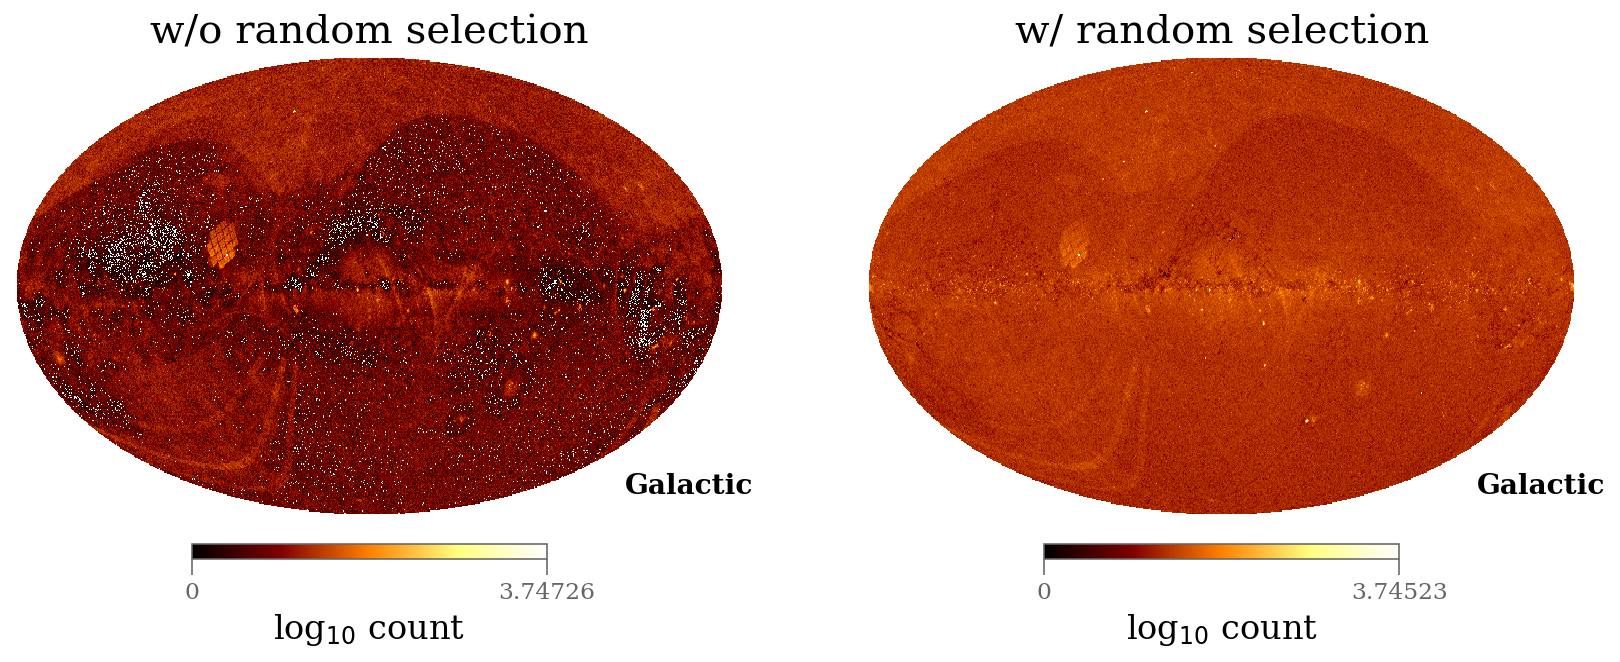

In [43]:
import warnings
import vaex
warnings.filterwarnings('ignore')
plt.figure(figsize=(14, 5))

plt.subplot(121)
with open(_smalloutput_ascii, 'r') as finput:
    _ = finput.readline()
    data = [np.int64(line.split()[1]) for line in finput]
ds_small = vaex.from_arrays(source_id = data)
ds_small.healpix_plot('source_id/34359738368', f='log10')
ax = plt.gcf().get_axes()
ax[-1].texts[0].set_visible(False)
ax[-1].set_xlabel(r'log$_{10}$ count');
ax[0].set_title('w/o random selection')

plt.subplot(122)
ds =  vaex.from_ascii(_alloutput_ascii)
ds.healpix_plot('SourceId/34359738368', f='log10')
ax = plt.gcf().get_axes()
ax[-1].texts[0].set_visible(False)
ax[-1].set_xlabel(r'log$_{10}$ count');
ax[2].set_title('w/ random selection')
LatexFigure('sky_map', "Sky distribution of the total validation selection in Galactic projection. This selection includes the random set.")

# Delivery to DPCC

Eventually, the new VSTs are all updated to integrate the random selection and are published on SVN (see [Table vst_random](#tab:vst_random)), where DPCC can download them to be integrated to the Apsis configuration. 
In addition, a totally combined list with unique set of SourceIds is generated and provided to DPCC.

In [44]:
Markdown("""
* SVN Location: [{0:s}]({1:s})
* And a common [JIRA:{2:s}]({3:s}) was opened to configuration updates 
""".format(config['output_svn_url'], config['baseurl'] + config['output_svn_url'],
           config['DCOPCref'], 'https://issues.cosmos.esa.int/gaia/browse/' + config['DCOPCref']))


* SVN Location: [/CU8/MPIA/software/cycle3/validation/VSTs/VST_20201210](https://gaia.esac.esa.int/dpacsvn/DPAC/CU8/MPIA/software/cycle3/validation/VSTs/VST_20201210)
* And a common [JIRA:DCOPC-469](https://issues.cosmos.esa.int/gaia/browse/DCOPC-469) was opened to configuration updates 


Once a new ingestion with tracking ID will be made at DPCC, Apsis will be able to run.
The results of each Apsis run at DPCC are published through GaiaWeb as `ValidationDataTables` (VDTs) allowing each module to obtain requested sufficient data to validate the scientific content of their outputs. Eventually new developments are required, therefore new runs and VSTs. The latter will result in new versions of this document. 

# Jira content

In [45]:
print("""
Dear DPCC,

This is a Validation Configuration Change Request for all Apsis modules related to their `VST` input files.

All files are available on the SVN:
{0:s}

Please find below the filenames per module
""".format(config['baseurl'] + config['output_svn_url'] + '/OUTPUTS'))
for name in keys:
    print("* {{{{{0:s}}}}}: {{{{mfx-random-{1:s}}}}}".format(name, config[name].split('/')[-1]))
    
print("""
A list of combined unique `sourceIds` was also produced:

* with random selection: {{{{{0:s}}}}}
""".format(config['ALL'].split('/')[-1]))


Dear DPCC,

This is a Validation Configuration Change Request for all Apsis modules related to their `VST` input files.

All files are available on the SVN:
https://gaia.esac.esa.int/dpacsvn/DPAC/CU8/MPIA/software/cycle3/validation/VSTs/VST_20201210/OUTPUTS

Please find below the filenames per module

* {{SMSgen}}: {{mfx-random-SMSgen_ValidationSourcesList-20.0.0.gbin}}
* {{DSC}}: {{mfx-random-DSC-VSTList-20200928-20.4.gbin}}
* {{GSPphot}}: {{mfx-random-GSPPHOT_ValidationSourcesList-2020-April-20.gbin}}
* {{FLAME}}: {{mfx-random-FLAME_ValidationSourceList-ast3.6.0.gbin}}
* {{GSPspec}}: {{mfx-random-GSP_SPEC_ValidationSourcesList-20.5.0.gbin}}
* {{MSC}}: {{mfx-random-MSC_VALIDATIONSOURCESLIST-20.3.1.gbin}}
* {{QSOC}}: {{mfx-random-QSOC_ValidationSourceTable-20200927.0.gbin}}
* {{EspEls}}: {{mfx-random-ESPELS-ValidationSourceList-20.5.0.gbin}}
* {{EspHs}}: {{mfx-random-ESPHS-ValidationSourceList-20.5.0.gbin}}
* {{EspUcd}}: {{mfx-random-ESP_UCD_VALIDATIONSOURCESLIST-R21.4.0.gbin}}
* {{Es

# SVN delivery

In [46]:
# force a save of the notebook before making the PDF
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [47]:
cmd = "SOURCE=vstprep make clean dpac pdf"
_cmd = subprocess.call(cmd, shell=True)
print(_cmd)

2


In [48]:
# make the directory on SVN
cmd = "svn import -m 'new VST delivery' . {0:s}".format(config['baseurl'] + config['output_svn_url'])
print(cmd)
_cmd = subprocess.call(cmd, shell=True)
print(_cmd)
if _cmd > 0:
    cmd = "svn add *.* --force && svn commit -m 'Updated delivery'"
    print(cmd)
    _cmd = subprocess.call(cmd, shell=True)
    print(_cmd)

svn import -m 'new VST delivery' . https://gaia.esac.esa.int/dpacsvn/DPAC/CU8/MPIA/software/cycle3/validation/VSTs/VST_20201210


KeyboardInterrupt: 

In [ ]:
# remove all missing files from the repository
cmd = "svn rm $( svn status | sed -e '/^!/!d' -e 's/^!//' ) && svn commit -m 'cleaning old files'"
print(cmd)
_cmd = subprocess.call(cmd, shell=True)
print(_cmd)